Title : Coin Flipping  instead of 3 puzzle problem

In [16]:
!pip install --upgrade qiskit


[notice] A new release of pip available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from qiskit import Aer, transpile, assemble, QuantumCircuit
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QAOA
from qiskit.aqua.components.optimizers import COBYLA

# Define the objective function
def objective_function(x):
    cost = 0
    state = [[1, 2, 3], [4, 5, 6], [7, 8, None]]

    for i in range(3):
        for j in range(3):
            if state[i][j] is not None and state[i][j] != x[i][j]:
                cost += 1

    return cost

# Define the QAOA solver
def solve_3puzzle_qaoa():
    backend = Aer.get_backend('qasm_simulator')
    optimizer = COBYLA(maxiter=100)
    qaoa = QAOA(optimizer=optimizer, p=1, quantum_instance=QuantumInstance(backend=backend))

    # Generate the initial state circuit
    initial_state = QuantumCircuit(9)
    for i in range(3):
        for j in range(3):
            initial_state.h(i * 3 + j)
    initial_state.barrier()

    # Generate the mixer circuit
    mixer = QuantumCircuit(9)
    mixer.cz(0, 1)
    mixer.cz(0, 3)
    mixer.cz(1, 2)
    mixer.cz(1, 4)
    mixer.cz(2, 5)
    mixer.cz(3, 4)
    mixer.cz(3, 6)
    mixer.cz(4, 5)
    mixer.cz(4, 7)
    mixer.cz(5, 8)
    mixer.cz(6, 7)
    mixer.cz(7, 8)

    # Solve the problem using QAOA
    qaoa.initial_state = initial_state
    qaoa.mixer = mixer
    qaoa.objective_function = objective_function

    result = qaoa.compute_minimum_eigenvalue()
    solution = result.x

    return solution

# Solve the 3-puzzle problem using QAOA
solution = solve_3puzzle_qaoa()

# Print the solution
print("Solution found!")
for i in range(0, 9, 3):
    print(solution[i:i + 3])


In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Define the initial state
initial_state = [2, 5, 3, 1, 8, 6, 4, 7, None]

# Define the goal state
goal_state = [1, 2, 3, 4, 5, 6, 7, 8, None]

# Define the quantum circuit
qc = QuantumCircuit(18, 18)

# Initialize the circuit with the initial state
for i, tile in enumerate(initial_state):
    if tile is not None:
        qc.x(i)

# Perform swaps to reach the goal state
for i, tile in enumerate(goal_state):
    if tile is not None:
        initial_index = initial_state.index(tile)
        target_index = goal_state.index(tile)
        qc.swap(i, initial_index + 9)
        qc.swap(i, target_index + 9)

# Measure the final state
qc.measure(range(9), range(9))

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts(qc)

# Find the most probable state (solution)
max_count = max(counts.values())
solution = [state for state, count in counts.items() if count == max_count][0]

# Print the solution
print("Solution found!")
for i in range(0, 9, 3):
    print(solution[i:i + 3])


Solution found!
000
000
000


In [2]:
from qiskit import Aer, execute, QuantumCircuit

# Define the quantum circuit
qc = QuantumCircuit(1, 1)
qc.h(0)  # Apply Hadamard gate for superposition
qc.measure(0, 0)  # Measure qubit and store result in classical bit

# Use the Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Set the number of shots (measurements)
num_shots = 1000

# Execute the quantum circuit on the simulator with multiple shots
job = execute(qc, simulator, shots=num_shots)

# Get the result of the measurements
result = job.result()
counts = result.get_counts()

# Print the coin flip results
print("Coin Flip Results:")
for outcome, count in counts.items():
    print(f"{outcome}: {count} ({count/num_shots*100:.2f}%)")


Coin Flip Results:
1: 540 (54.00%)
0: 460 (46.00%)


In [3]:
from qiskit import Aer, execute, QuantumCircuit

# Define the quantum circuit
qc = QuantumCircuit(1, 1)
qc.h(0)  # Apply Hadamard gate for superposition
qc.measure(0, 0)  # Measure qubit and store result in classical bit

# Use the Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Set the number of shots (measurements)
num_shots = 1000

# Execute the quantum circuit on the simulator with multiple shots
job = execute(qc, simulator, shots=num_shots)

# Get the result of the measurements
result = job.result()
counts = result.get_counts()

# Print the coin flip results
print("Coin Flip Results:")
for outcome, count in counts.items():
    print(f"{outcome}: {count} ({count/num_shots*100:.2f}%)")


Coin Flip Results:
0: 488 (48.80%)
1: 512 (51.20%)


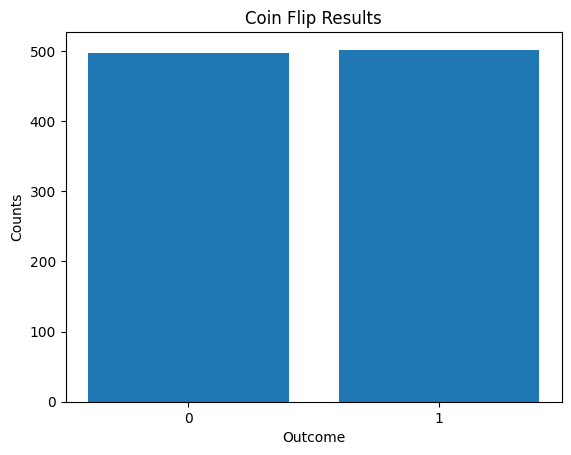

In [4]:
import matplotlib.pyplot as plt
from qiskit import Aer, execute, QuantumCircuit

# Define the quantum circuit
qc = QuantumCircuit(1, 1)
qc.h(0)  # Apply Hadamard gate for superposition
qc.measure(0, 0)  # Measure qubit and store result in classical bit

# Use the Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Set the number of shots (measurements)
num_shots = 1000

# Execute the quantum circuit on the simulator with multiple shots
job = execute(qc, simulator, shots=num_shots)

# Get the result of the measurements
result = job.result()
counts = result.get_counts()

# Plot the coin flip results
outcomes = list(counts.keys())
counts_list = list(counts.values())

plt.bar(outcomes, counts_list)
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.title('Coin Flip Results')
plt.show()
